In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Load Beijing PM2.5 data

In [2]:
# load data
df = pd.read_csv("PRSA_data_2010.1.1-2014.12.31.csv")
df.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 13 columns):
No       43824 non-null int64
year     43824 non-null int64
month    43824 non-null int64
day      43824 non-null int64
hour     43824 non-null int64
pm2.5    41757 non-null float64
DEWP     43824 non-null int64
TEMP     43824 non-null float64
PRES     43824 non-null float64
cbwd     43824 non-null object
Iws      43824 non-null float64
Is       43824 non-null int64
Ir       43824 non-null int64
dtypes: float64(4), int64(8), object(1)
memory usage: 4.3+ MB


# 2.Clean data

In [4]:
df = df.dropna()

# convert categorical to numberic
df['cbwd'] = pd.get_dummies(df['cbwd'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41757 entries, 24 to 43823
Data columns (total 13 columns):
No       41757 non-null int64
year     41757 non-null int64
month    41757 non-null int64
day      41757 non-null int64
hour     41757 non-null int64
pm2.5    41757 non-null float64
DEWP     41757 non-null int64
TEMP     41757 non-null float64
PRES     41757 non-null float64
cbwd     41757 non-null uint8
Iws      41757 non-null float64
Is       41757 non-null int64
Ir       41757 non-null int64
dtypes: float64(4), int64(8), uint8(1)
memory usage: 4.2 MB


In [5]:
df.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
24,25,2010,1,2,0,129.0,-16,-4.0,1020.0,0,1.79,0,0
25,26,2010,1,2,1,148.0,-15,-4.0,1020.0,0,2.68,0,0
26,27,2010,1,2,2,159.0,-11,-5.0,1021.0,0,3.57,0,0
27,28,2010,1,2,3,181.0,-7,-5.0,1022.0,0,5.36,1,0
28,29,2010,1,2,4,138.0,-7,-5.0,1022.0,0,6.25,2,0


# 3.EDA: plot pm2.5 from 2010 to 2014 years in Beijing

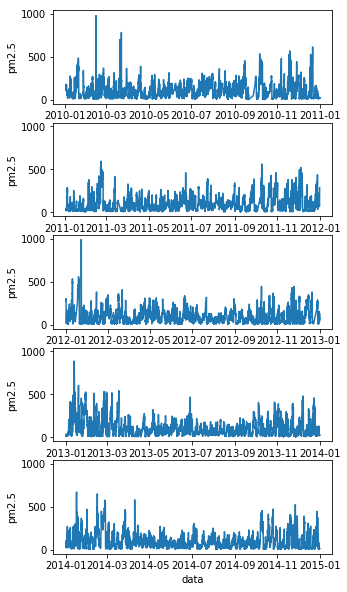

In [38]:
# Plot Time series
df['date'] = pd.to_datetime(df[['year','month','day','hour']])
df_2010 = df[df['year'] == 2010]
df_2011 = df[df['year'] == 2011]
df_2012 = df[df['year'] == 2012]
df_2013 = df[df['year'] == 2013]
df_2014 = df[df['year'] == 2014]

fig, axes = plt.subplots(5, sharey=True, figsize=(5, 10))
axes[0].plot(df_2010['date'],df_2010['pm2.5'])
axes[1].plot(df_2011['date'],df_2011['pm2.5'])
axes[2].plot(df_2012['date'],df_2012['pm2.5'])
axes[3].plot(df_2013['date'],df_2013['pm2.5'])
axes[4].plot(df_2014['date'],df_2014['pm2.5'])
for ax in axes:
    ax.set_xlabel('data')
    ax.set_ylabel('pm2.5')

# 4.Using LinearRegression to predict pm2.5

In [31]:
# LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [44]:
lm = LinearRegression(normalize=True)
X = df_2010[['DEWP', 'TEMP', 'PRES','Iws','cbwd','Is','Ir']]
y = df_2010['pm2.5']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lm.fit(X_train,y_train)
y_pred = lm.predict(X_test)


Text(0,0.5,'predict value')

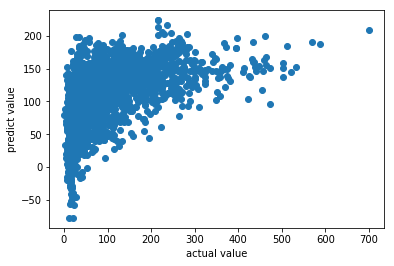

In [45]:
plt.scatter(y_test, y_pred)
plt.xlabel('actual value')
plt.ylabel('predict value')

# 5. Evaluate

In [46]:
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
RMSE

76.51225135497268